In [1]:
using Pkg

Pkg.activate("../ermacpr25")

  Activating project at `~/personal/working/minicurso-empacotamento/ermacpr25`


In [3]:

using Plots



"""

    caixa(L, W)

Cria a forma de um envelope retangular de dimensões L x W.

    - 'L': comprimento do envelope retangular.
    - 'W': largura do envelope retangular.

Retorna um objeto do tipo Shape.

"""
caixa(L, W) = Shape([0, W, W, 0], [0, 0, L, L])


"""

    poligono(x_ref, y_ref, lista_poligono)

Cria a forma de um polígono referenciado a partir do ponto (x_ref, y_ref).

    - 'x_ref': abscissa do ponto de referência.
    - 'y_ref': ordenada do ponto de referência.
    - 'lista_poligono': lista de vértices do polígono.

Retorna um objeto do tipo Shape.

"""
poligono(x_ref, y_ref, lista_poligono) = Shape(x_ref .+ lista_poligono[:, 1], 
    y_ref .+ lista_poligono[:, 2])


"""

    poligono_rotacionado(x_ref, y_ref, θ, lista_poligono)

Cria a forma de um polígono referenciado a partir do ponto (x_ref, y_ref) e 
rotacionado com ângulo θ.

    - 'x_ref': abscissa do ponto de referência.
    - 'y_ref': ordenada do ponto de referência.
    - 'θ': ângulo de rotação.
    - 'lista_poligono': lista de vértices do polígono.

Retorna um objeto do tipo Shape.

"""
poligono_rotacionado(x_ref, y_ref, θ, lista_poligono) = Shape(
    x_ref .+ cos(θ) * lista_poligono[:, 1] .- sin(θ) * lista_poligono[:, 2], 
    y_ref .+ sin(θ) * lista_poligono[:, 1] .+ cos(θ) * lista_poligono[:, 2])


"""

    circulo(x_ref, y_ref, raio)

Cria a forma de um círculo referenciado a partir do ponto (x_ref, y_ref) e de raio 
'raio'.

    - 'x_ref': abscissa do centro de referência.
    - 'y_ref': ordenada do centro de referência.
    - 'raio': raio do círculo.

Retorna um objeto do tipo Shape.

"""
function circulo(x_ref, y_ref, raio)
    θ = 0:5:360
    Shape(raio * sind.(θ) .+ x_ref, raio * cosd.(θ) .+ y_ref)
end


# ------------------------------------------------------------------------------
# Funções para desenhar problema e solução.
# ------------------------------------------------------------------------------


"""

    translacao_poligono(lista_vertices_pol)

Translada cada polígono até a origem.

    - 'lista_vertice_pol': lista contendo a lista de vértices de cada polígono.

"""
function translacao_poligono(lista_vertices_pol)

    # Faz uma cópia da lista de vértices
    nova_lista = deepcopy(lista_vertices_pol)
    
    # Calcula o número de polígonos
    np = length(nova_lista)
    
    for i = 1:np

        # Calcula o número de componentes convexas do polígono i
        ncc = length(nova_lista[i])

        for j = 1:ncc

            # Calcula o número de vértices da componente convexa j do polígono i
            nv = size(nova_lista[i][j])[1]

            # Subtrai as coordenadas do primeiro vértice da primeira componente 
            # convexa do polígono i dos demais vértices.
            for k=1:nv

                nova_lista[i][j][k, :] -= lista_vertices_pol[i][1][1, :]

            end

        end
    
    end
    
    return nova_lista

end


"""

    plota_problema(lista_centros_circ, lista_raios_circ, lista_vertice_pol, L, W)

Plota o problema de corte e empacotamento.

    - 'lista_centros_circ': lista contendo a lista dos centros dos círculos.
    - 'lista_raios_circ': lista contendo os raios dos círculos.
    - 'lista_vertice_pol': lista contendo a lista de vértices de cada polígono.
    - 'L': comprimento do envelope retangular.
    - 'W': largura do envelope retangular.

"""
function plota_problema(lista_vertice_pol, L, W)

   # nc = size(lista_raios_circ)[1]
    np = length(lista_vertice_pol)
    print(np)
    # Plota o envelope retangular.
    fig = plot(caixa(L, W), fillcolor=:white, legend = false, aspect_ratio=:equal)

    # Plota os círculos.
    #for i = 1:nc
       # plot!(fig, circulo(lista_centros_circ[i, 1], lista_centros_circ[i, 2], lista_raios_circ[i]), fillcolor = plot_color(:red, 0.5))
    #end

    # Plota os polígonos.
    for i = 1:np
        # Calcula o número de componentes convexas do polígono i.
        ncc = length(lista_vertice_pol[i])

        # Plota cada componente convexa.        
        for j = 1:ncc
            plot!(fig, poligono(0.0, 0.0, lista_vertice_pol[i][j]), fillcolor = plot_color(:blue, 0.5))
        end
    end

    fig

end


function reta(lista_poligonos)
    np = length(lista_poligonos)
    rt = Vector{Any}(undef,np)
    for i = 1:np
        ncc = length(lista_poligonos[i])
        rt[i]= Vector{Any}(undef,ncc)
        for j = 1 :ncc
        rt[i][j] = lista_poligonos[i][j][1:2, :]
        end
    end
         return rt
end

    
"""

    plota_solucao(lista_raios_circ, lista_vertice_pol, L, W, x)

Plota a solução do problema de corte e empacotamento.

    - 'lista_raios_circ': lista contendo os raios dos círculos.
    - 'lista_vertice_pol': lista contendo a lista de vértices de cada polígono (translado para origem).
    - 'L': comprimento do envelope retangular.
    - 'W': largura do envelope retangular.
    - 'x': solução encontrada pelo solver no formato [xC, yC, xP, yP, θP].

"""
function plota_solucao(lista_raios_circ, lista_vertice_pol, L, W, x)

    nc = size(lista_raios_circ)[1]
    np = length(lista_vertice_pol)

    # Plota o envelope retangular.
    fig = plot(caixa(L, W), fillcolor = :white, legend = false, aspect_ratio = :equal)

    # Plota os círculos.
    for i = 1:nc
        plot!(fig, circulo(x[2*i-1], x[2*i], lista_raios_circ[i]), fillcolor = plot_color(:red, 0.5))
    end

    # Plota os polígonos.
    for i = 1:np
        # Deslocamento no vetor de soluções 'x'.
        k = 2 * nc + 3 * i

        # Calcula o número de componentes convexas do polígono i.
        ncc = length(lista_vertice_pol[i])

        # Plota cada componente convexa.
        for j = 1:ncc
            plot!(fig, poligono_rotacionado(x[k - 2], x[k - 1], x[k], lista_vertice_pol[i][j]), fillcolor = plot_color(:blue, 0.5))
        end
    end

    fig

end


plota_solucao

In [4]:
# Pacotes e funções úteis:

using LinearAlgebra, JuMP, Ipopt


function cosseno_model_teste!(model, poligonos, ang, xP, yP)
    np = length(poligonos)
    nalpha = length(ang)
    nx = length(xP)
    ny = length(yP)
    nley = Vector{Any}(undef, np)
    nlex = Vector{Any}(undef, np)
    for i = 1:np
        nlex[i] = @NLexpression(model, [n = 1:length(poligonos[i]), h = 1:size(poligonos[i][n])[1]], 
                        poligonos[i][n][h, 1] * cos(ang[i]) - poligonos[i][n][h, 2] * sin(ang[i]) + xP[i])

        nley[i] = @NLexpression(model, [n = 1:length(poligonos[i]), h = 1:size(poligonos[i][n])[1]], 
                        poligonos[i][n][h, 1] * sin(ang[i]) + poligonos[i][n][h, 2] * cos(ang[i]) + yP[i])
    end
    return nlex, nley
end


function cdij!(model, reta, alpha_L, xL, yL)
    nr = length(reta)
    nlerc = Array{Any}(undef, nr)
    nlerd = Array{Any}(undef, nr)
    for i = 1:nr-1
        nlerc[i] = Array{Any}(undef, length(reta[i]))
        nlerd[i] = Array{Any}(undef, length(reta[i]))
        noutrascc = 0
        for j = i+1:nr
            if (reta[j]) != 0
                noutrascc += length(reta[j])
            end
        end
        for h = 1:length(reta[i])
            nlerc[i][h] = Array{Any}(undef, noutrascc)
            nlerd[i][h] = Array{Any}(undef, noutrascc)
            k = 0
            for n = i+1:nr # Fixa o Pol_j
                for l = 1:length(reta[n]) # Seleciona a l-esima comp. convexa do Pol_j
                    k += 1
                    nlerc[i][h][k] = @NLexpression(model, ((reta[i][h][2, 1] - reta[i][h][1, 1]) * sin(alpha_L[i,h,k]) + (reta[i][h][2, 2] - reta[i][h][1, 2]) * cos(alpha_L[i,h,k])) /
                                            ((reta[i][h][2, 1] - reta[i][h][1, 1]) * cos(alpha_L[i,h,k]) + (reta[i][h][1, 2] - reta[i][h][2, 2]) * sin(alpha_L[i,h,k])))
                    nlerd[i][h][k] = @NLexpression(model, yL[i,h,k] - nlerc[i][h][k] * xL[i,h,k])
                end
            end
        end
    end
    return nlerc, nlerd
end


function cdij_circ!(model, reta, alpha_L_circ, xL_circ, yL_circ, raio)
    nr = length(reta)
    nc = length(raio)
    nlerc_circ = Array{Any}(undef, nr)
    nlerd_circ = Array{Any}(undef, nr)
    
    for i = 1:nr
        nlerc_circ[i] = Array{Any}(undef, length(reta[i]))
        nlerd_circ[i] = Array{Any}(undef, length(reta[i]))
        noutrascc = 0
        
        for j = 1:nc
            noutrascc += 1
        end
        
        for h = 1:length(reta[i])
            nlerc_circ[i][h] = Array{Any}(undef, noutrascc)
            nlerd_circ[i][h] = Array{Any}(undef, noutrascc)
            k = 0
            
            for n = 1:nc # Fixa o circ
                k += 1
                nlerc_circ[i][h][k] = @NLexpression(model, ((reta[i][h][2, 1] - reta[i][h][1, 1]) * sin(alpha_L_circ[i,h,k]) + (reta[i][h][2, 2] - reta[i][h][1, 2]) * cos(alpha_L_circ[i,h,k])) /
                                            ((reta[i][h][2, 1] - reta[i][h][1, 1]) * cos(alpha_L_circ[i,h,k]) + (reta[i][h][1, 2] - reta[i][h][2, 2]) * sin(alpha_L_circ[i,h,k])))
                nlerd_circ[i][h][k] = @NLexpression(model, yL_circ[i,h,k] - nlerc_circ[i][h][k] * xL_circ[i,h,k])
            end
        end
    end
    
    return nlerc_circ, nlerd_circ
end









function constraints!(model,poligonos,nlex,nley,nlerc,nlerd,l,w)
for i = 1:length(poligonos)
 nle_x = nlex[i]
 nle_y = nley[i]
 @NLconstraint(model, [n =1:length(poligonos[i]), h =1:size(poligonos[i][n])[1]], nle_x[n,h] >= 0 )
 @NLconstraint(model,[n =1:length(poligonos[i]), h =1:size(poligonos[i][n])[1]],  nle_y[n,h] >= 0  )
 @NLconstraint(model, [n =1:length(poligonos[i]), h =1:size(poligonos[i][n])[1]], nle_x[n,h] <= w )
 @NLconstraint(model,[n =1:length(poligonos[i]), h =1:size(poligonos[i][n])[1]],  nle_y[n,h] <= l )       
end
end
#ok

function n_sobreposicao!(model, poligonos, reta, nlex, nley, nlerc, nlerd)
    for i = 1:length(poligonos)-1
          print(i)
        nle_x = nlex[i]
        nle_y = nley[i]
        k=0
        for h = 1:length(poligonos[i])
           
            c = nlerc[i][h]
            d = nlerd[i][h]
             k =0
            for n = i+1:length(poligonos)
                nle_xj = nlex[n]
                nle_yj = nley[n]
                for l = 1:length(poligonos[n])
                    k +=1
                    for q = 1:size(poligonos[i][h], 1)
                        
                          @NLconstraint(model, nle_y[h,q] - c[k]*nle_x[h,q] - d[k] <= 0.0)
                     
                    end
                    for q = 1:size(poligonos[n][l], 1)
                        
                          @NLconstraint(model, nle_yj[l,q] - c[k]*nle_xj[l,q] - d[k] >= 0.0)
                     
                    end
#                  
                end
                
            end
            
            
        end
    end
    return model
end


#ok



function contcir!(model,raios,xC,yC,l,w)
#colocar l e w como variável local
for i=1:length(xC)
    @NLconstraint(model, 0<= xC[i]- raios[i]  )
    @NLconstraint(model,  0<= yC[i]- raios[i]  )
    @NLconstraint(model,  raios[i]+xC[i] <= w)
    @NLconstraint(model,  raios[i]+yC[i] <= l)
    @NLconstraint(model, xC[i] >= 0)
    @NLconstraint(model, yC[i] >= 0)
end
 return model
end
#ok



function nsobrecirc!(model,Xc,yC,raios)
for i= 1:length(xC)
    for j= i+1:length(xC)
        @NLconstraint(model, (xC[i] - xC[j])^2.0 + (yC[i] - yC[j])^2.0 >= (raios[i] + raios[j])^2.0)
    end
end
return model
end    
#ok    
    
function delta!(model, poligonos, xC, yC, nlerc_circ, nlerd_circ, raios)
        for i = 1:length(poligonos)
            for h = 1:length(poligonos[i])
                k = 0
                for q = 1:length(xC) 
                    k += 1
                    c = nlerc_circ[i][h][k]
                    d = nlerd_circ[i][h][k]
                    @NLconstraint(model,  0 <= c*xC[q]- yC[q]+ d )
                    @NLconstraint(model, (c*xC[q]- yC[q]+ d)^2  >= (raios[q]^2)*(c ^ 2.0 + 1.0) )
                    
                end
            end
        end
    
    return model
end

                    
function last_re!(model, poligonos, xC, yC, nlerc_circ, nlerd_circ, nlex, nley)
   for i = 1:length(poligonos)
         for h = 1:length(poligonos[i])
                k = 0
                for q = 1:length(xC) 
                    k += 1
                    c = nlerc_circ[i][h][k]
                    d = nlerd_circ[i][h][k]
                    for f = 1:size(poligonos[i][h], 1)
                        @NLconstraint(model, nley[i][h,f] - c*nlex[i][h,f] - d >= 0)
                    end     
                end
            end
        end
    
    return model
end



┌ Warning: Module ColorVectorSpace with build ID fafbfcfd-29ba-808f-0000-042b983cf1a4 is missing from the cache.
│ This may mean ColorVectorSpace [c3611d14-8923-5661-9e6a-0046d554d3a4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:2018


last_re! (generic function with 1 method)

In [5]:
circ_r = [2.0; 3.0; 5.0]
lista_poligonos = [[[0.0 1.155; -0.866 -0.577; 0.866 -0.577; 0.0 -1.155; -0.866 0.577; 0.866 0.577]],
    [[0.0 0.0; 2.0 0.0; 2.0 2.0; 0.0 2.0]], 
    [[4.0 0.0; 6.0 0.0; 7.0 1.73; 6.0 3.46; 4.0 3.46; 3.0 1.73]],
    [[8.0 2.0; 10.0 0.0; 11.0 2.0; 9.0 3.0], [10.0 0.0; 16.0 3.0; 15.0 4.0; 11.0 2.0]], [[0.0 0.0; 2.0 0.0; 1.5 1.5]],
    [[0.0 0.0; 2.0 0.0; 2.0 2.0; 1.0 3.0; 3.0 3.0; 4.0 2.0; 3.0 1.0; 1.0 1.0]]

    
]
L = 20
W = 20
lista_rotacionada =translacao_poligono(lista_poligonos)
rt = reta(lista_rotacionada)
rt = reta(lista_rotacionada)
nr = length(rt)
nc = length(circ_r)



#MODELO
model = Model(Ipopt.Optimizer)
    
    # Variáveis das coordenadas de referência
    @variable(model, xC[i = 1:length(circ_r)])
    @variable(model, yC[i = 1:length(circ_r)])
    @variable(model, xP[i = 1:nr])
    @variable(model, yP[1:nr])
    @variable(model, theta_P[1:nr])

    # Componentes da reta para comparação de polígonos
    @variable(model, yL[i = 1:nr-1, h = 1:length(rt[i]), n = 1:sum(length(rt[j]) for j = i+1:nr)], start = rand())
    @variable(model, xL[i = 1:nr-1, h = 1:length(rt[i]), n = 1:sum(length(rt[j]) for j = i+1:nr)], start=rand())
    @variable(model, alpha_L[i = 1:nr-1, h = 1:length(rt[i]), n = 1:sum(length(rt[j]) for j = i+1:nr)], start=rand())

    # Componentes da reta para o delta
    @variable(model, yL_circ[i = 1:nr, h = 1:length(rt[i]), n = 1:nc], start = rand())
    @variable(model, xL_circ[i = 1:nr, h = 1:length(rt[i]), n = 1:nc], start=rand())
    @variable(model, alpha_L_circ[i = 1:nr, h = 1:length(rt[i]), n =1:nc], start=rand())
    
    nlex, nley = cosseno_model_teste!(model, lista_rotacionada, theta_P, xP, yP)
    nlerc, nlerd = cdij!(model, rt, alpha_L, xL, yL)
    nlerc_circ, nlerd_circ = cdij_circ!(model, rt, alpha_L_circ, xL_circ, yL_circ, circ_r)
    
    # Restrições de contenção
    contcir!(model, circ_r, xC, yC, L, W)
    nsobrecirc!(model, xC, yC, circ_r)
    constraints!(model, lista_rotacionada, nlex, nley, nlerc, nlerd, L, W)  
    
    # Restrições de não sobreposição
    n_sobreposicao!(model, lista_rotacionada, rt, nlex, nley, nlerc, nlerd)
    delta!(model, lista_rotacionada, xC, yC, nlerc_circ, nlerd_circ, circ_r)
    last_re!(model, lista_rotacionada, xC, yC, nlerc_circ, nlerd_circ, nlex, nley)
    
    @objective(model, Min, 0)
    
    # Chama o otimizador Ipopt:
    optimize!(model)


# Chama o otimizador Ipopt:
status = optimize!(model)


12345
******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:     2362
Number of nonzeros in Lagrangian Hessian.............:     3034

Total number of variables............................:      147
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequal

In [6]:
xP_values = value.(xP)
yP_values = value.(yP)
theta_P_values = value.(theta_P)
xL_values = value.(xL)
yL_values = value.(yL)
alpha_L_values = value.(alpha_L)
xC_values = value.(xC)
yC_values = value.(yC)
print(xP_values)

[2.289138647893646, 4.511458761733861, 0.24197335155211452, 5.795483086783777, 14.34014747078436, 8.291270282490439]

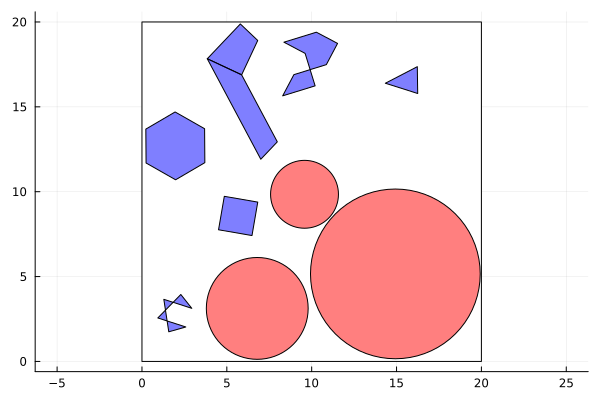

In [7]:
#x =[xC_values[1],yC_values[1],xP_values[1], yP_values[1], theta_P_values[1],xP_values[2], yP_values[2], theta_P_values[2]]
#print(x)
z = [ [[i, j] for (i, j) in zip(xC_values, yC_values)]; 
      [[i, j, k] for (i, j, k) in zip(xP_values, yP_values, theta_P_values)] ]
z = vcat(z...)
#print(z)
plota_solucao(circ_r,lista_rotacionada,L, W, z)